# Skalierung von nummerischen Werten
## Initialisierung

In [3]:
from sklearn import preprocessing as pp
import pandas as pd

In [4]:
df = pd.DataFrame({'Werte':[-50,-5,20,50,100]}).astype(float)
columnData = pd.DataFrame(df["Werte"])
df

,Werte
0,-50.0
1,-5.0
2,20.0
3,50.0
4,100.0


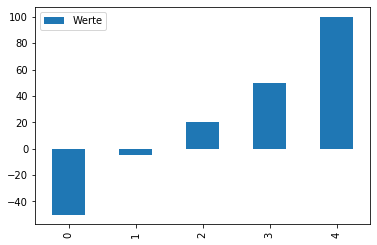

In [16]:
df.plot(kind='bar')

## Manuelle Skalierierung

In [17]:
normalisierung = lambda x: (x-x.min()) / (x.max() - x.min())
zentrierung = lambda x: (x-x.mean())
standardisierung = lambda x: (x-x.mean()) / x.std()

In [18]:
dfMan = pd.DataFrame(df, copy=True)
dfMan["Normalisierung"] = columnData.pipe(normalisierung)
dfMan["Zentrierung"] = columnData.pipe(zentrierung)
dfMan["Standardisierung"] = columnData.pipe(standardisierung)
dfMan

,Werte,Normalisierung,Zentrierung,Standardisierung
0,-50.0,0.000000,-73.0,-1.291479
1,-5.0,0.300000,-28.0,-0.495362
2,20.0,0.466667,-3.0,-0.053074
3,50.0,0.666667,27.0,0.477670
4,100.0,1.000000,77.0,1.362245


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001885E1219C8>,
      dtype=object)

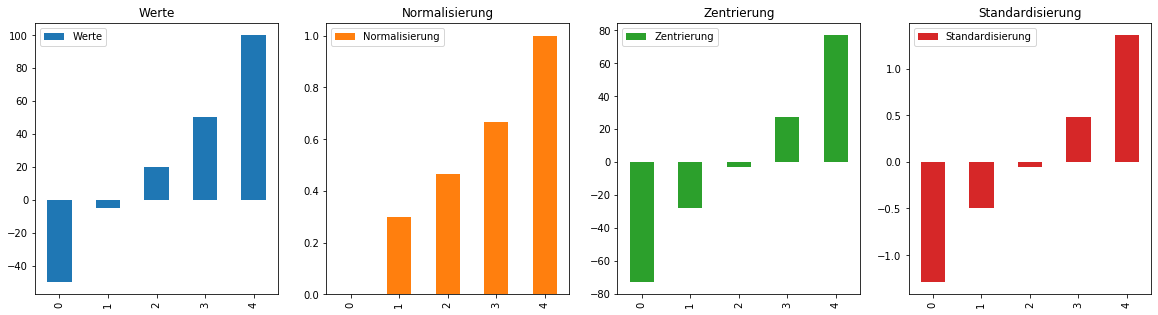

In [23]:
dfMan.plot(kind='bar', subplots=True, layout=(1,4), figsize=(20,5))

## Skalierung mit SKLearn

In [9]:
dfSKL = pd.DataFrame(df, copy=True)
dfSKL["MinMaxScaler"] = pp.MinMaxScaler().fit_transform(columnData) # = Normalisierung
# dfSKL["RobustScaler"] = pp.RobustScaler(with_centering=True, with_scaling=False).fit_transform(columnData) # = Zentrierung
dfSKL["StandardScaler"] = pp.StandardScaler().fit_transform(columnData) # = Standardardisierung
dfSKL["MaxAbsScaler"] = pp.MaxAbsScaler().fit_transform(columnData)
dfSKL["RobustScaler"] = pp.RobustScaler().fit_transform(columnData)
dfSKL["PowerTransformer"] = pp.PowerTransformer().fit_transform(columnData)
dfSKL["QuantileTransformer"] = pp.QuantileTransformer().fit_transform(columnData)
dfSKL["Normalizer"] = pp.Normalizer().fit_transform(columnData)
dfSKL

C:\ProgramData\Miniconda3\lib\site-packages\sklearn\preprocessing\_data.py:2347: UserWarning: n_quantiles (1000) is greater than the total number of samples (5). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


,Werte,MinMaxScaler,StandardScaler,MaxAbsScaler,RobustScaler,PowerTransformer,QuantileTransformer,Normalizer
0,-50.0,0.000000,-1.443918,-0.50,-1.272727,-1.528802,0.00,-1.0
1,-5.0,0.300000,-0.553831,-0.05,-0.454545,-0.487862,0.25,-1.0
2,20.0,0.466667,-0.059339,0.20,0.000000,0.005338,0.50,1.0
3,50.0,0.666667,0.534052,0.50,0.545455,0.557327,0.75,1.0
4,100.0,1.000000,1.523036,1.00,1.454545,1.453999,1.00,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023BE1FE3B48>,
      dtype=object)

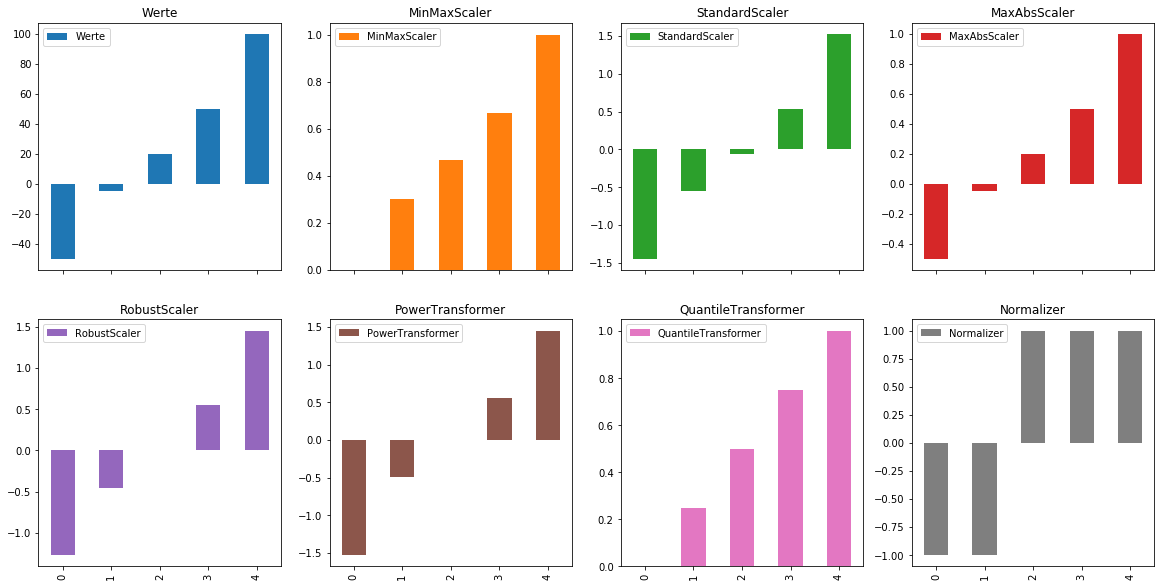

In [10]:
dfSKL.plot(kind='bar', subplots=True, layout=(2,4), figsize=(20,10))